In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import random
import math
import statistics

# check data information

In [2]:
#read data
df  = pd.read_excel('Concrete_Data.xls')
features = df.columns
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
#check missing value
df.apply(lambda x: sum(x.isnull()))

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [5]:
#copy data, save raw data
concrete_df = df.copy()

# replace outliers

<AxesSubplot:>

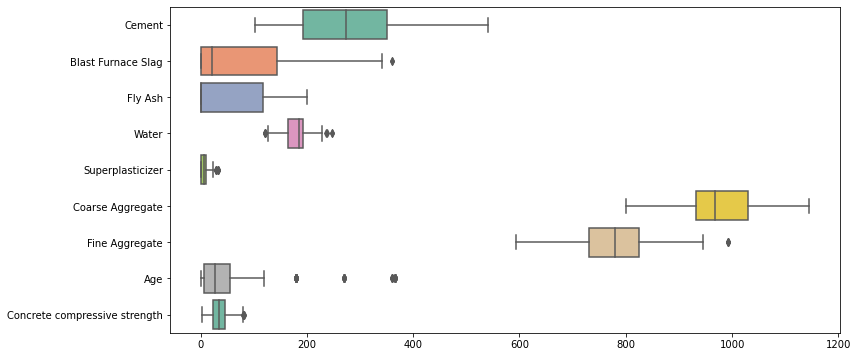

In [6]:
#ckeck outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=concrete_df, orient="h", palette="Set2", dodge=False)

<AxesSubplot:>

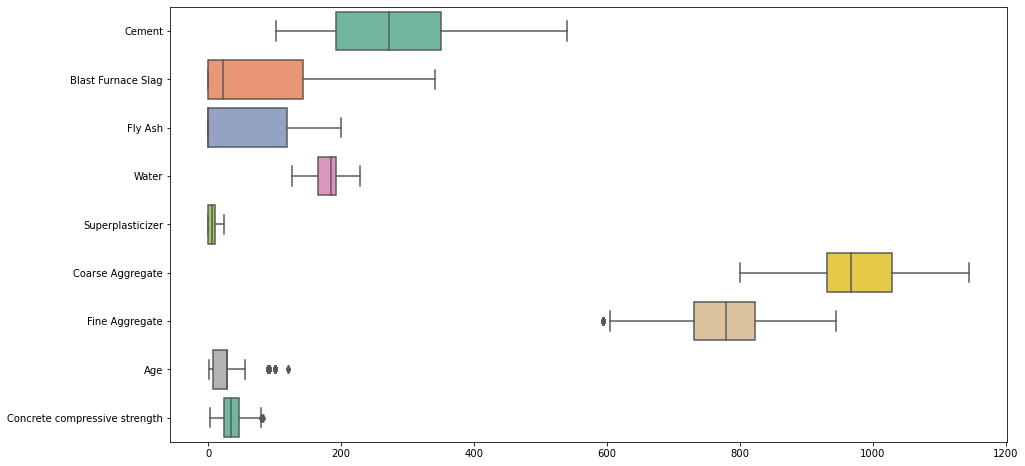

In [7]:
#replace outliers
concrete_df_new = concrete_df.copy()
for col_name in concrete_df_new.columns[:-1]:
    q1 = concrete_df_new[col_name].quantile(0.25)
    q3 = concrete_df_new[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    concrete_df_new.loc[(concrete_df_new[col_name] < low) | (concrete_df_new[col_name] > high), col_name] = concrete_df_new[col_name].median()
plt.figure(figsize=(15,8))
sns.boxplot(data=concrete_df_new, orient="h", palette="Set2", dodge=False)

# Standardization

In [8]:
#Standardization
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [9]:
#XScaled = concrete_df.apply(zscore)
XScaled = concrete_df_new.apply(zscore)
XScaled2 = concrete_df.apply(zscore)

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,4.335798e-17,1.000486,-1.715219,-0.850026,-0.079130,0.658977,2.477918
Blast Furnace Slag,1030.0,4.248489e-16,1.000486,-0.858191,-0.858191,-0.600407,0.814184,3.150353
Fly Ash,1030.0,1.267056e-15,1.000486,-0.847132,-0.847132,-0.847132,1.001836,2.281122
Water,1030.0,-4.093813e-16,1.000486,-2.673240,-0.813466,0.162552,0.502458,2.250549
Superplasticizer,1030.0,-3.282164e-17,1.000486,-1.090890,-1.090890,0.069134,0.749621,3.183845
Coarse Aggregate,1030.0,-9.011131e-17,1.000486,-2.212137,-0.526514,-0.063289,0.726766,2.214232
Fine Aggregate,1030.0,-5.716301e-16,1.000486,-2.269697,-0.528758,0.087340,0.631232,2.192293
Age,1030.0,-1.662101e-16,1.000486,-1.124724,-0.908821,-0.153159,-0.153159,3.157360
Concrete compressive strength,1030.0,4.486163e-16,1.000486,-2.005443,-0.725298,-0.082351,0.617961,2.801689


# gradient decent model

In [10]:
# initialize m,b function
def initialize(dim):
    b=random.random()
    m=np.random.rand(dim)
    return b,m

In [11]:
#calculate Rsquared function
def var_Exp(cost,Y):
    y_mean=Y.mean()
    dif=Y-y_mean
    var=np.sum(np.dot(dif.T,dif))/len(Y)
    return 1-cost/var

# multivariate regression MSE

In [12]:
# calculate prediction
def pred_MSE_mul(b,m,X):
    return b + np.dot(X,m)

In [13]:
#calculate cost: MSE
def MSE_loss(Y,Y_pre):
    Y_dif=Y-Y_pre
    return np.sum(Y_dif**2)/len(Y)

In [14]:
#update m,b
def update_MSE_mul(X,Y,b,m,alpha):
    Y_pre=pred_MSE_mul(b,m,X)
    db=(np.sum(Y_pre-Y)*2)/len(Y)
    #print("db",db)
    b_n=b-alpha*db
    m_n=list(range(len(m)))
    for i in range(len(m)):
        dw=2*np.dot((Y_pre-Y),X[:,i])/len(Y)
        #print("dw",dw)
        m_n[i]=m[i]-alpha*dw
    return b_n,m_n


In [15]:
#define running function
def run_MSE_mul(X,Y,alpha,num_iterations,delta):
    b,m=initialize(X.shape[1])
    print(b,m)
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    prev_cost=float("inf")
    Y_pre=pred_MSE_mul(b,m,X)
    this_cost=MSE_loss(Y,Y_pre)
    print(prev_cost - this_cost)
    gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
    
    while prev_cost - this_cost > delta and iter_num < num_iterations:
        iter_num +=1
        b,m=update_MSE_mul(X,Y,b,m,alpha)
        Y_pre=pred_MSE_mul(b,m,X)
        prev_cost=this_cost
        this_cost=MSE_loss(Y,Y_pre)
        gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
        
    ve=var_Exp(this_cost,Y_pre)
    print("Final Estimate of b and m : ",b,m)
    print("Variance explained:",ve)
    return gd_iterations_df,b,m,ve


In [16]:
#split data standarlized, preprocessed data
Y_set = XScaled['Concrete compressive strength'].values
X_set = XScaled.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [17]:
#split data standarlized,raw data
Y_set1 = XScaled2['Concrete compressive strength'].values
X_set1 = XScaled2.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_set1, Y_set1, train_size=900,test_size=130, random_state=6)

In [18]:
#run model on training data
gd_iterations_df,b,m,ve=run_MSE_mul(X_train,Y_train,alpha=0.1,num_iterations=200000,delta=1e-5)

0.9452536814885143 [0.13894527 0.74862874 0.63706775 0.55637637 0.98576745 0.92577673
 0.98680499 0.27003892]
inf
Final Estimate of b and m :  -0.0017759230838209903 [0.669298745306521, 0.3903936939855271, 0.19811536904989677, -0.18361233449245445, 0.07460755722439127, -0.007408810253346295, -0.046943905608937436, 0.5128189636280494]
Variance explained: 0.5987599818273279


Text(0, 0.5, 'Cost or MSE')

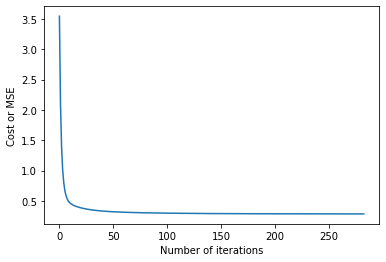

In [19]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

In [20]:
#calculate VE on raw train data
Y_pre=pred_MSE_mul(b,m,X_train1)
mse=MSE_loss(Y_train1,Y_pre)
var_Exp(mse,Y_pre)

0.3555934612187084

In [21]:
#calculate VE on preprocessed test data
Y_pre=pred_MSE_mul(b,m,X_test)
mse=MSE_loss(Y_test,Y_pre)
var_Exp(mse,Y_pre)

0.6085270420718567

In [22]:
#calculate VE on raw train data
Y_pre=pred_MSE_mul(b,m,X_test1)
mse=MSE_loss(Y_test1,Y_pre)
var_Exp(mse,Y_pre)

0.40419338604734834

# univariate regression MSE

In [23]:
#define loss function for univariate
def MSE_loss_function(x, y, m, b):
    n=len(x)
    return 1 / n * np.sum((y - (m*x + b)) ** 2)

In [24]:
#define function run model on univariate
def run_MSE_uni(feature, x_train, y_train, x_test, y_test,X_train1, X_test1, Y_train1, Y_test1,num_iterations, alpha,delta):

    # init
    #b=0.01
    #m=0.1
    b,m=initialize(1)
    #print(m)
    old_mse = float("inf")
    iteration = 0
    mse = MSE_loss_function(x_train, y_train, m, b)
    #print("mse",mse)

    # when to stop, start training
    while old_mse - mse > delta and iteration < num_iterations:
        y_pred = m * x_train + b
        m = m - alpha / len(x_train) * np.sum(-2 * x_train * (y_train - y_pred))
        #print(m)
        b = b - alpha / len(x_train) * np.sum(-2 * y_train - y_pred)
        old_mse = mse
        mse = MSE_loss_function(x_train, y_train, m, b)
        #print("old_mse",old_mse)
        #print("mse",mse)
        #print("old_mse - mse",old_mse - mse)
        iteration += 1

    # print result
    print('%s' %(feature))
    print("Stop after %s iteration" %(iteration))
    print('Final m: %s' %(m))
    print('Final b: %s' %(b))
    print(f"Final Regression algorithm: f(x) = { np.round(m, 3) } * x + {np.round(b, 3)}" )

    print('Variance explained of your models on the testing data points: %s' %(1-MSE_loss_function(x_test, y_test, m, b)/statistics.variance(y_test)))
    print('Variance explained of your models on the training dataset: %s' %(1-MSE_loss_function(x_train, y_train, m, b)/statistics.variance(y_train)))
    print("----------------------------------------------------------------")
    print('Variance explained of your models on the raw testing data points: %s' %(1-MSE_loss_function(X_test1, Y_test1, m, b)/statistics.variance(Y_test1)))
    print('Variance explained of your models on the raw training dataset: %s' %(1-MSE_loss_function(X_train1, Y_train1, m, b)/statistics.variance(Y_train1)))
    print("----------------------------------------------------------------")

    # plot
    plt.figure()
    plt.scatter(x_train, y_train, s=5)
    x_range = np.arange(np.min(x_train), np.max(x_train), 0.1)
    y_range = m * x_range + b
    plt.plot(x_range, y_range)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(features[-1])
    plt.show()
    plt.close()

In [25]:
#incase start from here, I copy new split function
#split data not standardized,preprocessed
Y_set = concrete_df_new['Concrete compressive strength'].values
X_set = concrete_df_new.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 900:130 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [26]:
#split data not standardized,raw data
Y_set1 = df['Concrete compressive strength'].values
X_set1 = df.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 900:130 train test data ratio and randon seeding 6
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_set1, Y_set1, train_size=900,test_size=130, random_state=6)

Cement
Stop after 12408 iteration
Final m: [0.07973483]
Final b: 13.134636925189938
Final Regression algorithm: f(x) = [0.08] * x + 13.135
Variance explained of your models on the testing data points: 0.2418291829846979
Variance explained of your models on the training dataset: 0.2482316372252592
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: 0.2418291829846979
Variance explained of your models on the raw training dataset: 0.2482316372252592
----------------------------------------------------------------


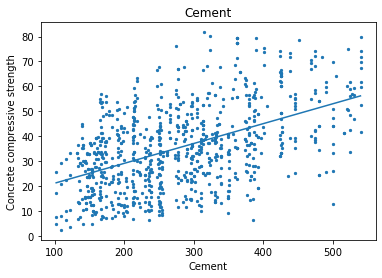

Blast Furnace Slag
Stop after 34705 iteration
Final m: [0.02295607]
Final b: 33.8518131588916
Final Regression algorithm: f(x) = [0.023] * x + 33.852
Variance explained of your models on the testing data points: 0.038295451584332785
Variance explained of your models on the training dataset: 0.01472490745579813
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: 0.038295451584332785
Variance explained of your models on the raw training dataset: 0.01399893230237459
----------------------------------------------------------------


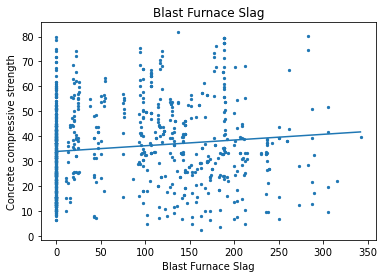

Fly Ash
Stop after 38212 iteration
Final m: [-0.021176]
Final b: 36.65405187479854
Final Regression algorithm: f(x) = [-0.021] * x + 36.654
Variance explained of your models on the testing data points: 0.023168648272968162
Variance explained of your models on the training dataset: 0.00780387098387425
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: 0.023168648272968162
Variance explained of your models on the raw training dataset: 0.00780387098387425
----------------------------------------------------------------


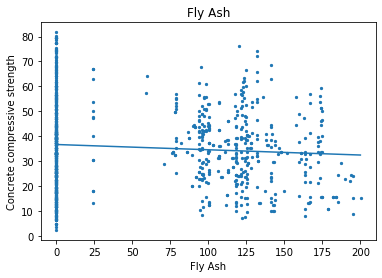

Water
Stop after 76575 iteration
Final m: [-0.25226478]
Final b: 81.34199687816204
Final Regression algorithm: f(x) = [-0.252] * x + 81.342
Variance explained of your models on the testing data points: 0.04987307949259456
Variance explained of your models on the training dataset: 0.10111962206108072
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: 0.028437969512623673
Variance explained of your models on the raw training dataset: 0.09082049126407621
----------------------------------------------------------------


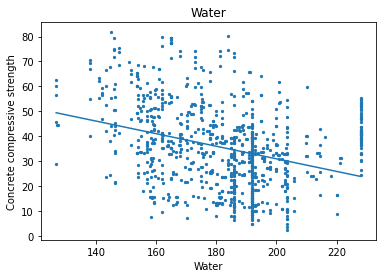

Superplasticizer
Stop after 29332 iteration
Final m: [1.1152991]
Final b: 29.291625765898686
Final Regression algorithm: f(x) = [1.115] * x + 29.292
Variance explained of your models on the testing data points: 0.11120644395952817
Variance explained of your models on the training dataset: 0.12039177835566706
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: 0.11488193154245185
Variance explained of your models on the raw training dataset: 0.1348945058628498
----------------------------------------------------------------


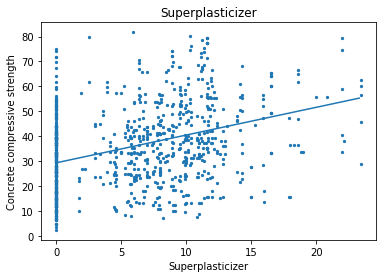

Coarse Aggregate
Stop after 1 iteration
Final m: [-11.74618099]
Final b: 0.38788386947362163
Final Regression algorithm: f(x) = [-11.746] * x + 0.388
Variance explained of your models on the testing data points: -436759.5138092391
Variance explained of your models on the training dataset: -480472.8043389211
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: -436759.5138092391
Variance explained of your models on the raw training dataset: -480472.8043389211
----------------------------------------------------------------


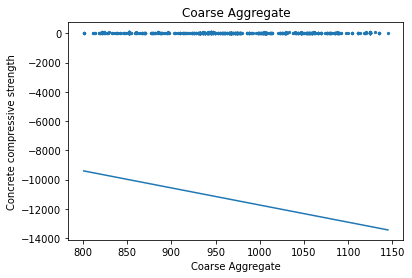

Fine Aggregate
Stop after 1 iteration
Final m: [-9.40565883]
Final b: 0.6206950029827911
Final Regression algorithm: f(x) = [-9.406] * x + 0.621
Variance explained of your models on the testing data points: -173119.1227496267
Variance explained of your models on the training dataset: -196430.3908192493
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: -173119.1227496267
Variance explained of your models on the raw training dataset: -197109.19954336702
----------------------------------------------------------------


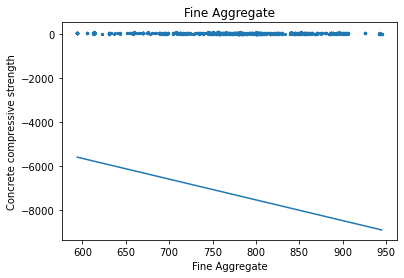

Age
Stop after 24597 iteration
Final m: [0.30305009]
Final b: 25.85283320633449
Final Regression algorithm: f(x) = [0.303] * x + 25.853
Variance explained of your models on the testing data points: 0.22094582742170965
Variance explained of your models on the training dataset: 0.25402279289779894
----------------------------------------------------------------
Variance explained of your models on the raw testing data points: -0.8707990495234716
Variance explained of your models on the raw training dataset: -0.5726760873288781
----------------------------------------------------------------


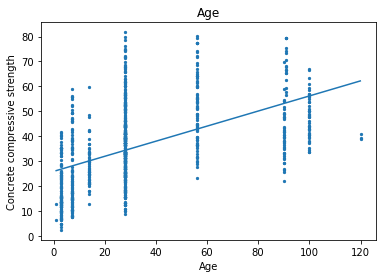

In [27]:
#fit models for every feature
for i, feature in enumerate(features[:-1]):
    x_train = X_train[:, i]
    x_test = X_test[:, i]
    x_train1 = X_train1[:, i]
    x_test1 = X_test1[:, i]
    run_MSE_uni(feature, x_train, Y_train, x_test, Y_test, x_train1,x_test1,Y_train1,Y_test1,num_iterations=200000,alpha=0.00001,delta=1e-5)

# multivariate regression MAE

In [28]:
#incase start from here, I copy new split function
#split data standarlized
Y_set = XScaled['Concrete compressive strength'].values
X_set = XScaled.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [29]:
#need a new function for MAE and RIdge
#calculate Rsquared MAE
def var_Exp_new(Y_pre,Y):
    y_mean=Y.mean()
    SST=sum((Y-y_mean)**2)
    SSE=sum((Y-Y_pre)**2)
    SSR=SST-SSE
    
    return SSR/SST

In [30]:
# calculate prediction
def pred_MAE_mul(b,m,X):
    return b + np.dot(X,m)

In [31]:
#define loss function
def MAE_loss(Y,Y_pre):
    Y_dif=Y-Y_pre
    return np.sum(abs(Y_dif))/len(Y)

In [32]:
#define update function
def update_MAE_mul(X,Y,b,m,alpha):
    Y_pre=pred_MAE_mul(b,m,X)
    diff=Y_pre-Y
    g=np.array(list(map(lambda diff : 0 if diff == 0 else 1 if diff > 0 else -1, list(X.dot(m) - Y))))
    db=(np.sum(g))/len(Y)
    #print("db",db)
    b_n=b-alpha*db
    m_n=list(range(len(m)))
    for i in range(len(m)):
        dw=sum(g*X[:,i])/len(Y)
        #print("dw",dw)
        m_n[i]=m[i]-alpha*dw
    return b_n,m_n

In [33]:
#define running function
def run_MAE_mul(X,Y,alpha,num_iterations,delta):
    b,m=initialize(X.shape[1])
    print(b,m)
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    prev_cost=float("inf")
    Y_pre=pred_MAE_mul(b,m,X)
    this_cost=MAE_loss(Y,Y_pre)
    print(prev_cost - this_cost)
    gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
    
    while abs(prev_cost - this_cost) > delta and iter_num < num_iterations:
        iter_num +=1
        b,m=update_MAE_mul(X,Y,b,m,alpha)
        Y_pre=pred_MAE_mul(b,m,X)
        prev_cost=this_cost
        this_cost=MAE_loss(Y,Y_pre)
        gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
 
    ve=var_Exp_new(Y_pre,Y)
    print("Final Estimate of b and m : ",b,m)
    print("Variance explained:",ve)
    return gd_iterations_df,b,m,ve

In [36]:
#run function on training data
gd_iterations_df,b,m,ve=run_MAE_mul(X_train,Y_train,alpha=0.001,num_iterations=200000,delta=1e-5)

0.279053941225881 [0.72971785 0.99800501 0.30696726 0.49465375 0.33119396 0.37145975
 0.7861669  0.32481842]
inf
Final Estimate of b and m :  0.0071983856703168765 [1.0894505130907401, 0.7729043684459992, 0.449559656619727, 0.21796855474703117, 0.24881258782732618, 0.33417711917285947, 0.34333385227593627, 0.49566405062296287]
Variance explained: 0.6607856363492844


In [37]:
#calculate VE on preprocessed test data
Y_pre=pred_MAE_mul(b,m,X_test)
var_Exp_new(Y_pre,Y_test)

0.7135352483515304

# univariate regression MAE

In [38]:
#incase start from here, I copy new split function
#split data not standardized
Y_set = concrete_df_new['Concrete compressive strength'].values
X_set = concrete_df_new.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [39]:
#define loss function for univariate
def MAE_loss_function(x, y, m, b):
    n=len(x)
    return 1 / n * np.sum(abs(y - (m*x + b)))

In [40]:
#define running function
def run_MSE_uni(feature, x_train, y_train, x_test, y_test,num_iterations, alpha,delta):

    # init
    b,m=initialize(1)
    #print(m)
    old_mse = float("inf")
    iteration = 0
    mse = MAE_loss_function(x_train, y_train, m, b)
    #print("mse",mse)

    # when to stop, start training
    while old_mse - mse > delta and iteration < num_iterations:
        y_pred = m * x_train + b
        diff=y_pred-y_train
        g=np.array(list(map(lambda diff : 0 if diff == 0 else 1 if diff > 0 else -1, list(x_train*m - y_train))))
        db=(np.sum(g))/len(y_train)
        b=b-alpha*db
        dm=sum(g.T*x_train)/len(y_train)
        m = m -alpha*dm
        #print(m)
 
        old_mse = mse
        mse = MAE_loss_function(x_train, y_train, m, b)
        #print("old_mse",old_mse)
        #print("mse",mse)
        #print("old_mse - mse",old_mse - mse)
        iteration += 1

    # print result
    print('%s' %(feature))
    print("Stop after %s iteration" %(iteration))
    print('Final m: %s' %(m))
    print('Final b: %s' %(b))
    print(f"Final Regression algorithm: f(x) = { np.round(m, 3) } * x + {np.round(b, 3)}" )
    y_pred1=m * x_test + b
    ve1=var_Exp_new(y_pred1,y_test)
    ve2=var_Exp_new(y_pred,y_train)
    print('Variance explained of your models on the testing data points: %s' %(ve1))
    print('Variance explained of your models on the training dataset: %s' %(ve2))
    print("----------------------------------------------------------------")


"""    # plot
    plt.figure()
    plt.scatter(x_train, y_train, s=5)
    x_range = np.arange(np.min(x_train), np.max(x_train), 0.1)
    y_range = m * x_range + b
    plt.plot(x_range, y_range)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(features[-1])
    plt.show()
    plt.close()"""

'    # plot\n    plt.figure()\n    plt.scatter(x_train, y_train, s=5)\n    x_range = np.arange(np.min(x_train), np.max(x_train), 0.1)\n    y_range = m * x_range + b\n    plt.plot(x_range, y_range)\n    plt.title(feature)\n    plt.xlabel(feature)\n    plt.ylabel(features[-1])\n    plt.show()\n    plt.close()'

In [41]:
#fit model for every feasture
for i, feature in enumerate(features[:-1]):
    x_train = X_train[:, i]
    x_test = X_test[:, i]
    run_MSE_uni(feature, x_train, Y_train, x_test, Y_test, num_iterations=200000,alpha=0.000001,delta=1e-5)

Cement
Stop after 1300 iteration
Final m: [0.11795399]
Final b: 0.7218232877853946
Final Regression algorithm: f(x) = [0.118] * x + 0.722
Variance explained of your models on the testing data points: 0.14543387232189448
Variance explained of your models on the training dataset: 0.17958166168570328
----------------------------------------------------------------
Blast Furnace Slag
Stop after 18023 iteration
Final m: [0.20923006]
Final b: 0.7979883140576053
Final Regression algorithm: f(x) = [0.209] * x + 0.798
Variance explained of your models on the testing data points: -1.9858439313979837
Variance explained of your models on the training dataset: -2.28937064662029
----------------------------------------------------------------
Fly Ash
Stop after 10099 iteration
Final m: [0.26970985]
Final b: 0.32059130960852933
Final Regression algorithm: f(x) = [0.27] * x + 0.321
Variance explained of your models on the testing data points: -3.272730811078198
Variance explained of your models on the

# multivariate Ridge regression

In [42]:
#incase start from here, I copy new split function
#split data standarlized
Y_set = XScaled['Concrete compressive strength'].values
X_set = XScaled.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [43]:
# calculate prediction
def pred_MSE_mul(b,m,X):
    return b + np.dot(X,m)

In [44]:
#incase start from here, I copy MSE loss function here
def MSE_loss(Y,Y_pre):
    #print("Yf",Y_pre)
    y_dif=Y-Y_pre
    return np.sum(y_dif**2)/len(Y)

In [45]:
#define function calculate ridge loss
def ridgeMSE(Y,Y_pre, lam, m):
    mse = MSE_loss(Y,Y_pre)
    j=np.dot(m,m)
    ridge_mse = mse + lam *j
    return ridge_mse

In [46]:
#define update function
def update_ridgeMSE_mul(X,Y,b,m,alpha,lam):
    Y_pre=pred_MSE_mul(b,m,X)
    db=(np.sum(Y_pre-Y)*2)/len(Y)+2*lam*b
    #print("db",db)
    b_n=b-alpha*db
    m_n=list(range(len(m)))
    for i in range(len(m)):
        dw=2*np.dot((Y_pre-Y),X[:,i])/len(Y)+2*lam*m[i]
        #print("dw",dw)
        m_n[i]=m[i]-alpha*dw
    return b_n,m_n

In [47]:
#define running function
def run_Rid_mul(X,Y,alpha,num_iterations,delta,lam):    
    b,m=initialize(X.shape[1])
    print(b,m)
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    prev_cost=float("inf")
    Y_pre=pred_MSE_mul(b,m,X)
    #print(Y_pre.shape)
    #print(Y_pre)
    this_cost=ridgeMSE(Y,Y_pre,lam,m)
    #print(this_cost)
    #print(prev_cost - this_cost)
    gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
    
    while prev_cost - this_cost > delta and iter_num < num_iterations:
        iter_num +=1
        b,m=update_ridgeMSE_mul(X,Y,b,m,alpha,lam)
        Y_pre=pred_MSE_mul(b,m,X)
        prev_cost=this_cost
        this_cost=ridgeMSE(Y,Y_pre,lam,m)
        
        gd_iterations_df.loc[iter_num]=[iter_num,this_cost]
        
    ve=var_Exp_new(Y_pre,Y)
    print("Final Estimate of b and m : ",b,m)
    print("Variance explained:",ve)
    return gd_iterations_df,b,m,ve


In [48]:
#fit model on training data
gd_iterations_df,b,m,ve=run_Rid_mul(X_train,Y_train,alpha=0.1,num_iterations=200000,delta=1e-5,lam=0.01)

0.0019938052247394644 [0.0672086  0.3667174  0.70861323 0.21628648 0.21657096 0.58608074
 0.87367018 0.16056458]
Final Estimate of b and m :  -0.002256030321943038 [0.6213433591283002, 0.3457189337031707, 0.15871122481651367, -0.20666382924550528, 0.07940878097235306, -0.03303656992051361, -0.08080103283012947, 0.5083598941162553]
Variance explained: 0.7127475921069383


In [49]:
# test data VE
Y_pre=pred_MSE_mul(b,m,X_test)
var_Exp_new(Y_pre,Y_test)

0.72953028125188

# unitivariate Ridge regression

In [50]:
#incase start from here, I copy new split function
#split data not standardized
Y_set = concrete_df_new['Concrete compressive strength'].values
X_set = concrete_df_new.drop(labels= "Concrete compressive strength" , axis = 1).values

# data spliting using 80:20 train test data ratio and randon seeding 6
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, train_size=900,test_size=130, random_state=6)

In [51]:
#define ridge regression loss function for univariate
def Rid_loss_function(x, y, m, b,lam):
    n=len(x)
    mse=1 / n * np.sum((y - (m*x + b)) ** 2)
    ridge_mse = mse + lam * (m**2)
    return ridge_mse

In [52]:
#define running function
def run_MSE_uni(feature, x_train, y_train, x_test, y_test,num_iterations, alpha,delta,lam):

    # init
    b,m=initialize(1)
    #print(m)
    old_mse = float("inf")
    iteration = 0
    mse = Rid_loss_function(x_train, y_train, m, b,lam)
    #print("mse",mse)

    # when to stop, start training
    while old_mse - mse > delta and iteration < num_iterations:
        y_pred = m * x_train + b
        dm=2*np.dot((y_pred-y_train),x_train)/len(y_train)+2*lam*m
        m = m - alpha *dm
        #print(m)
        db=(np.sum(y_pred-y_train)*2)/len(y_train)+2*lam*b
        b = b - alpha / len(x_train) * np.sum(-2 * y_train - y_pred)
        old_mse = mse
        mse = Rid_loss_function(x_train, y_train, m, b,lam)
        #print("old_mse",old_mse)
        #print("mse",mse)
        #print("old_mse - mse",old_mse - mse)
        iteration += 1

    # print result
    print('%s' %(feature))
    print("Stop after %s iteration" %(iteration))
    print('Final m: %s' %(m))
    print('Final b: %s' %(b))
    print(f"Final Regression algorithm: f(x) = { np.round(m, 3) } * x + {np.round(b, 3)}" )
    y_pred1=m * x_test + b
    ve1=var_Exp_new(y_pred1,y_test)
    ve2=var_Exp_new(y_pred,y_train)
    print('Variance explained of your models on the testing data points: %s' %(ve1))
    print('Variance explained of your models on the training dataset: %s' %(ve2))
    print("----------------------------------------------------------------")



    """# plot
    plt.figure()
    plt.scatter(x_train, y_train, s=5)
    x_range = np.arange(np.min(x_train), np.max(x_train), 0.1)
    y_range = m * x_range + b
    plt.plot(x_range, y_range)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(features[-1])
    plt.show()
    plt.close()"""

In [53]:
#fit models for every feasture
for i, feature in enumerate(features[:-1]):
    x_train = X_train[:, i]
    x_test = X_test[:, i]
    run_MSE_uni(feature, x_train, Y_train, x_test, Y_test, num_iterations=200000,alpha=0.00001,delta=1e-5,lam=0.001)

Cement
Stop after 11788 iteration
Final m: [0.07973346]
Final b: 13.135074653754106
Final Regression algorithm: f(x) = [0.08] * x + 13.135
Variance explained of your models on the testing data points: 0.23595263366347033
Variance explained of your models on the training dataset: 0.24739538864004154
----------------------------------------------------------------
Blast Furnace Slag
Stop after 35105 iteration
Final m: [0.02295492]
Final b: 33.85200975261459
Final Regression algorithm: f(x) = [0.023] * x + 33.852
Variance explained of your models on the testing data points: 0.0308402570442778
Variance explained of your models on the training dataset: 0.013628910601164364
----------------------------------------------------------------
Fly Ash
Stop after 37939 iteration
Final m: [-0.02117966]
Final b: 36.65452580481318
Final Regression algorithm: f(x) = [-0.021] * x + 36.655
Variance explained of your models on the testing data points: 0.015605784000799044
Variance explained of your models